# 2022S AML 2304 Natural Language Processing
## Final Assignment
### Instructor:	Harriet Huang

### Group Members: 
- Bhanu Prakash Mahadevuni C0850515 
- Deeksha Naikap C0835440
- Pramod Reddy Gurrala C0850493
- Sai Varun Kollipara C0828403

### Problem Statement
- In this Assignment, our group has performed multiple **Word Vectorization** Methods on a news dataset provided. We have build **Machine Learning Model** for calulating the performance of the Vectorization Methods. We also used **Data Visualization** for comparing the performance of the ML models.

### About Dataset
- The datasets provided for the assignment are **20 Newsgroup Dataset** and **Google News**. We have considered **20 Newsgroup Dataset**, This dataset consists of multiple subsets like train, test and all. Each of these subsets is strctured in the same format as json. We have analyzed the dataset and performed some EDA on the data, where some features are removed, data is split into train, test and validate.

### 1. Package Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline

from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import feature_selection
from sklearn.pipeline import Pipeline


import nltk
import string
from textblob import Word
from nltk.corpus import stopwords
from collections import defaultdict


from time import time
from multiprocessing import cpu_count
import random

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
from collections import Counter

### 2. Dataset Importing and EDA

- For the 20 newsgroup data there are a total of 21 groups, we have identified some Categories to be worked on and collecting them from the library

In [4]:
category = ['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',]

### 2.1 Cleaning the Data by removing unused parts of data

- Create the variables based on the test and train subsets and split the data as required. We have also removed header and footer since there are many characters that is difficult to process

In [5]:
news_groups_train = fetch_20newsgroups(subset='train', categories=category, shuffle=True, download_if_missing=False, remove=('headers', 'footers'))
news_groups_test = fetch_20newsgroups(subset='test', categories=category, shuffle=True, download_if_missing=False, remove=('headers', 'footers'))

### 2.2 Data Splitting

- Splitting the data is a basic method that is essential for Machine Learning Models, We are creating training, testing and validation datasets.

In [6]:
x_train, y_train = news_groups_train.data, news_groups_train.target

x_sp_train, x_sp_val, y_sp_train, y_sp_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

x_test, y_test = news_groups_test.data, news_groups_test.target

In [7]:
print(news_groups_train.data[0:2])

['In article <tcmayC5M2xv.JEx@netcom.com> tcmay@netcom.com (Timothy C. May) writes:\n\n>But is it any worse than the current unsecure system? It becomes much\n>worse, of course, if the government then uses this "Clinton Clipper"\n>to argue for restrictions on unapproved encryption. (This is the main\n>concern of most of us, I think. The camel\'s nose in the tent, etc.)\n\nExcuse me?  This has *already* happened.  There\'s a couple of humps in\nthe tent already.  Ask the folks at Qualcomm what became of the\nnon-trivial encryption scheme they proposed for use in their CDMA\ndigitial cellular phone standard?  There *already* are restrictions in\nplace.', 'In article <C5sqv8.EDB@acsu.buffalo.edu> SFEGUS@ubvm.cc.buffalo.edu writes:\n>In article <79857@cup.portal.com>\n>mmm@cup.portal.com (Mark Robert Thorson) writes:\n> \n>>\n>>No, there is something called the "Delany Amendment" which makes carcinogenic\n>>food additives illegal in any amount.  This was passed by Congress in the\n> \n>I t

### 2.3 Understanding the Data

- There are many variables that are new to understand, so we are playing with the variables that are gathered till now. 

In [8]:
print(news_groups_train.target_names)

['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [9]:
print(news_groups_train.target)

[ 9 11 11 ... 12  1 11]


In [10]:
print(len(news_groups_train.data), len(news_groups_train.target_names), len(news_groups_train.target))
print(type(news_groups_train.data), type(news_groups_train.target_names), type(news_groups_train.target))

7698 13 7698
<class 'list'> <class 'list'> <class 'numpy.ndarray'>


In [11]:
print(len(news_groups_test.data), len(news_groups_test.target_names), len(news_groups_test.target))
print(type(news_groups_test.data), type(news_groups_test.target_names), type(news_groups_test.target))

5124 13 5124
<class 'list'> <class 'list'> <class 'numpy.ndarray'>


In [12]:
print("count for data in 20newsgroups", len(x_sp_train), len(x_sp_val), len(x_test))

count for data in 20newsgroups 6158 1540 5124


In [13]:
print("count for train and validation data in 20newsgroups", len(x_sp_train) + len(x_sp_val), " and for test data", len(x_test))

count for train and validation data in 20newsgroups 7698  and for test data 5124


In [14]:
print("count for train data in 20newsgroups", len(x_sp_train))

count for train data in 20newsgroups 6158


In [15]:
print("count for validation data in 20newsgroups", len(x_sp_val))

count for validation data in 20newsgroups 1540


In [16]:
print("count for test data in 20newsgroups", len(x_test))

count for test data in 20newsgroups 5124


### 2.4 Data Visualization

- Data Visualization is an easy way to understand the data, since charts and visuals are better than numerical representations. 

### 2.4.1 Pie Chart - Visualizing the Count of the Categories

In [17]:
label_20, values = zip(*Counter(news_groups_train.target).items())
indexes = np.arange(len(label_20)) 


ValueError: too many values to unpack (expected 2)

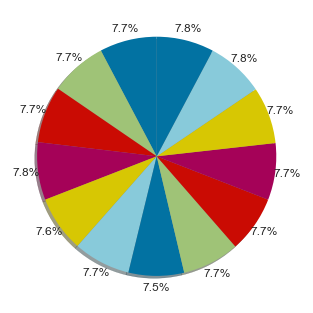

In [18]:
# plot the labels
label_20 = news_groups_test.target_names

val = values

patches, texts = plt.pie(val, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)

# plt.legend(patches, labels, loc="best")
plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')
plt.show()

### 2.4.2 Bar Chart - Visualizing the Count of the Categories

In [19]:
def show_distributation(data):
    dict = {}
    
    for index, name in enumerate(news_groups_train.target_names):
        dict.setdefault(name, np.sum(data==index))
    
    print(dict)
    print(dict.keys())
    print(dict.values())
    
    index = np.arange(len(news_groups_train.target_names))
    
    plt.figure(figsize=(10,5))
    plt.bar(index, dict.values())
    
    plt.xticks(index, dict.keys(), rotation=90)
    plt.title("category distributation")
    plt.xlabel("data category")
    plt.ylabel("count")
    
    plt.show()

{'comp.graphics': 584, 'comp.os.ms-windows.misc': 591, 'comp.sys.ibm.pc.hardware': 590, 'comp.sys.mac.hardware': 578, 'comp.windows.x': 593, 'rec.autos': 594, 'rec.motorcycles': 598, 'rec.sport.baseball': 597, 'rec.sport.hockey': 600, 'sci.crypt': 595, 'sci.electronics': 591, 'sci.med': 594, 'sci.space': 593}
dict_keys(['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space'])
dict_values([584, 591, 590, 578, 593, 594, 598, 597, 600, 595, 591, 594, 593])


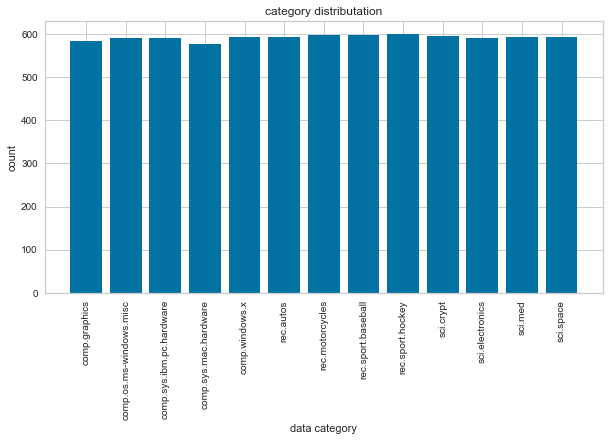

In [20]:
show_distributation(y_train)

{'comp.graphics': 389, 'comp.os.ms-windows.misc': 394, 'comp.sys.ibm.pc.hardware': 392, 'comp.sys.mac.hardware': 385, 'comp.windows.x': 395, 'rec.autos': 396, 'rec.motorcycles': 398, 'rec.sport.baseball': 397, 'rec.sport.hockey': 399, 'sci.crypt': 396, 'sci.electronics': 393, 'sci.med': 396, 'sci.space': 394}
dict_keys(['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space'])
dict_values([389, 394, 392, 385, 395, 396, 398, 397, 399, 396, 393, 396, 394])


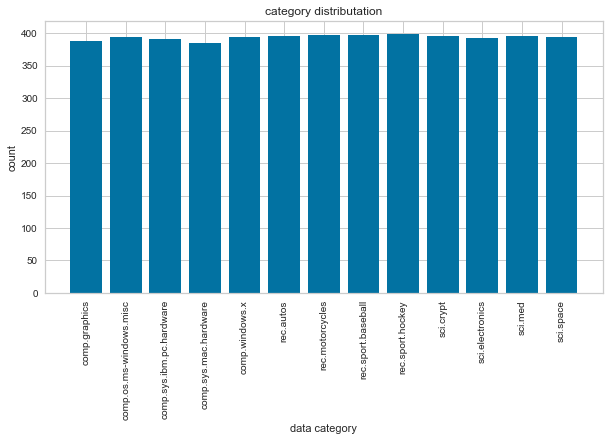

In [21]:
show_distributation(y_test)

{'comp.graphics': 122, 'comp.os.ms-windows.misc': 118, 'comp.sys.ibm.pc.hardware': 111, 'comp.sys.mac.hardware': 107, 'comp.windows.x': 113, 'rec.autos': 116, 'rec.motorcycles': 116, 'rec.sport.baseball': 129, 'rec.sport.hockey': 121, 'sci.crypt': 118, 'sci.electronics': 120, 'sci.med': 120, 'sci.space': 129}
dict_keys(['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space'])
dict_values([122, 118, 111, 107, 113, 116, 116, 129, 121, 118, 120, 120, 129])


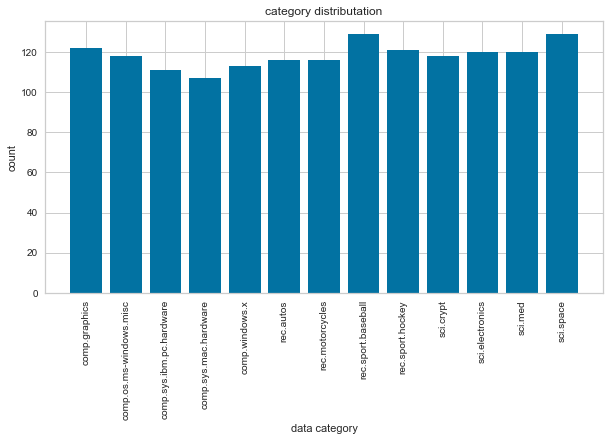

In [22]:
show_distributation(y_sp_val)

{'comp.graphics': 462, 'comp.os.ms-windows.misc': 473, 'comp.sys.ibm.pc.hardware': 479, 'comp.sys.mac.hardware': 471, 'comp.windows.x': 480, 'rec.autos': 478, 'rec.motorcycles': 482, 'rec.sport.baseball': 468, 'rec.sport.hockey': 479, 'sci.crypt': 477, 'sci.electronics': 471, 'sci.med': 474, 'sci.space': 464}
dict_keys(['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space'])
dict_values([462, 473, 479, 471, 480, 478, 482, 468, 479, 477, 471, 474, 464])


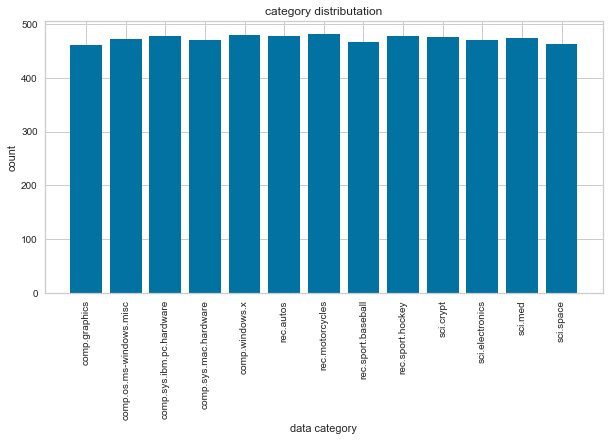

In [23]:
show_distributation(y_sp_train)

### Visualizing based on the words

In [24]:
def show_words(data):
    count = []
    for f in data:
        count.append(len(f.split()))
    plt.figure(figsize=(10,5))
    plt.hist(count, bins=20)
    plt.title("words distributation")
    plt.xlabel("words count")
    plt.ylabel("words weight")
    plt.show()

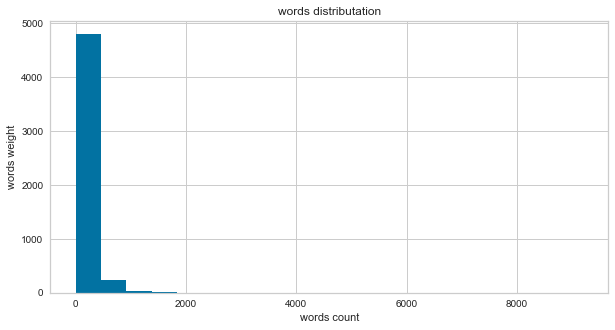

In [25]:
show_words(x_test)

### Visualizing based on the Characters

In [26]:
def show_chars(data):
    count = []
    for f in data:
        count.append(len(f))
    plt.figure(figsize=(10,5))
    plt.hist(count, bins=20)
    plt.title("chars distributation")
    plt.xlabel("chars count")
    plt.ylabel("chars count")
    plt.show()

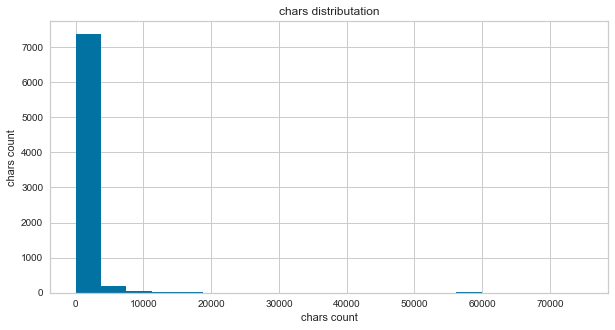

In [27]:
show_chars(x_train)

- This EDA step has solved most of the problems and made the data ready for real-time model building and implementation. The following are the things covered in the EDA analysis
    - Data Understanding
    - Data Cleaning
    - Data Pre-processing
    - Data Visualizaion
    - Data Splitting

### 3. Word Vectorization

- Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.
- One very popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. Scikit-learn implements this decomposition method as the sklearn.manifold.TSNE transformer.

### 3.1 Count Vectorization

- CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

### 3.1.1 Count Vectorization Function and Variables 

In [28]:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 5 means "ignore terms that appear in less than 5 documents".

In [29]:
vectorizer = CountVectorizer(max_df=0.97, min_df=3,
                                max_features=None,
                                stop_words='english')
t0 = time()

vec_x_sp_train = vectorizer.fit_transform(x_sp_train)
vec_x_sp_val = vectorizer.fit_transform(x_sp_val)

vec_x_train = vectorizer.fit_transform(x_train)
vec_x_test = vectorizer.fit_transform(x_test)


print("done in %0.3fs." % (time() - t0))

done in 3.325s.


In [30]:
print(vec_x_sp_train.shape)
print(vec_x_sp_val.shape)
print(vec_x_train.shape)
print(vec_x_test.shape)

(6158, 21254)
(1540, 8370)
(7698, 25124)
(5124, 17719)


In [31]:
type(vec_x_sp_train)

scipy.sparse.csr.csr_matrix

In [32]:
print(vec_x_train)

  (0, 3830)	1
  (0, 22119)	1
  (0, 12947)	1
  (0, 15837)	2
  (0, 6350)	2
  (0, 22118)	1
  (0, 22474)	1
  (0, 24535)	1
  (0, 24502)	2
  (0, 7286)	1
  (0, 23315)	1
  (0, 7014)	1
  (0, 10906)	1
  (0, 23416)	1
  (0, 6163)	1
  (0, 6167)	1
  (0, 3770)	1
  (0, 19236)	2
  (0, 23133)	1
  (0, 9037)	2
  (0, 14430)	1
  (0, 6574)	1
  (0, 22349)	1
  (0, 5447)	1
  (0, 16078)	1
  :	:
  (7697, 5231)	1
  (7697, 3420)	2
  (7697, 6062)	1
  (7697, 22219)	1
  (7697, 9115)	1
  (7697, 11426)	1
  (7697, 21930)	1
  (7697, 9666)	1
  (7697, 8549)	1
  (7697, 8516)	1
  (7697, 3324)	1
  (7697, 2506)	1
  (7697, 22746)	1
  (7697, 20084)	2
  (7697, 8518)	1
  (7697, 5387)	1
  (7697, 14780)	2
  (7697, 23746)	2
  (7697, 14781)	2
  (7697, 15377)	1
  (7697, 1500)	1
  (7697, 17608)	1
  (7697, 13924)	1
  (7697, 7706)	1
  (7697, 2932)	1


### 3.1.2 Count Vectorization with TSNE Visualizer

C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB o

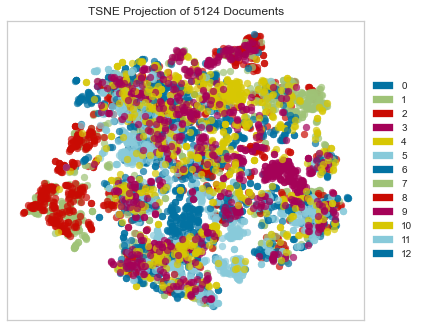

<AxesSubplot:title={'center':'TSNE Projection of 5124 Documents'}>

In [33]:
tsne = TSNEVisualizer()
tsne.fit(vec_x_test, y_test)
tsne.show()

### 3.2 TF-IDF Vectorization

- TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

### 3.2.1 TF-IDF Vectorization Function and Variables 

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.97, min_df=2,
                                max_features=None,
                                stop_words='english')
t0 = time()

tfidf_x_sp_train = tfidf_vectorizer.fit_transform(x_sp_train)
tfidf_x_sp_val = tfidf_vectorizer.transform(x_sp_val)

tfidf_x_train = tfidf_vectorizer.transform(x_train)
tfidf_x_test = tfidf_vectorizer.transform(x_test)

print("done in %0.3fs." % (time() - t0))

done in 3.013s.


In [35]:
print(tfidf_x_sp_train.shape)
print(tfidf_x_sp_val.shape)
print(tfidf_x_train.shape)
print(tfidf_x_test.shape)

(6158, 31551)
(1540, 31551)
(7698, 31551)
(5124, 31551)


In [36]:
print(tfidf_x_train)

  (0, 30710)	0.04001673180719335
  (0, 30665)	0.22976010083140172
  (0, 29340)	0.09694991470444973
  (0, 29328)	0.05922738134750787
  (0, 29208)	0.17785183992820947
  (0, 28973)	0.17210658094624462
  (0, 28596)	0.14458275107538915
  (0, 28163)	0.1496840001410517
  (0, 28027)	0.060752630341837095
  (0, 27871)	0.3495984002025758
  (0, 27736)	0.17210658094624462
  (0, 27735)	0.1655299270628614
  (0, 26685)	0.09435235115491673
  (0, 25099)	0.1205068591835062
  (0, 24199)	0.2848077605731127
  (0, 23148)	0.16969795103562535
  (0, 22789)	0.12333277807592573
  (0, 22048)	0.08908238663575008
  (0, 21865)	0.09327732154768795
  (0, 20315)	0.13531347803696264
  (0, 20267)	0.09018432718215279
  (0, 20011)	0.22212210736679897
  (0, 18222)	0.10674695355746351
  (0, 16341)	0.17210658094624462
  (0, 14993)	0.19722178090648082
  :	:
  (7697, 12296)	0.12316057256336826
  (7697, 11818)	0.0771190838646151
  (7697, 11633)	0.10491536779112419
  (7697, 10943)	0.10627028712010475
  (7697, 10903)	0.121961522706

### 3.2.2 TF-IDF with TSNE Visualizer

C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB o

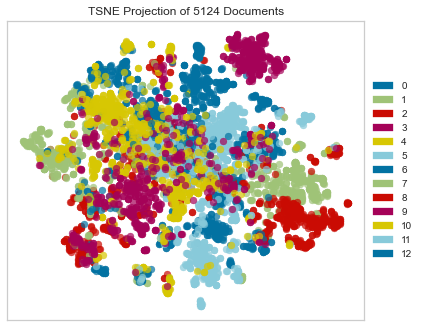

<AxesSubplot:title={'center':'TSNE Projection of 5124 Documents'}>

In [37]:
tsne = TSNEVisualizer()
tsne.fit(tfidf_x_test, y_test)
tsne.show()

- In this step we were able to use the training and testing variables from the previous step and embeed them to word vectorization methods. We have completed the following
    - Count Vectorization
        - Used the Training and Testing Variables and created vec variables
        - Used new vec variables for TSNE Visualizer
    - TF-IDF Vectorization
        - Used the Training and Testing Variables and created tfidf variables
        - Used new vec variables for TSNE Visualizer
    - We have identified the differencce between the word vectorization methods.  

### 4 Model Building

- A language model in NLP is a probabilistic statistical model that determines the probability of a given sequence of words occurring in a sentence based on the previous words. It helps to predict which word is more likely to appear next in the sentence.

### 4.1 Evaluation Function

In [38]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=40)

In [39]:
def show_performance_with_gscv(name, model, x_train, y_train, params):
    results = {}
    results['model_name'] = name
    gscv = GridSearchCV(model, params, cv=3, n_jobs=cpu_count()-1, return_train_score=True)
    
    gscv.fit(x_train, y_train)
    
    results['params'] = gscv.best_params_
    results['train_time'] = np.mean(gscv.cv_results_['mean_fit_time'])
    results['val_time'] = np.mean(gscv.cv_results_['mean_score_time'])
    
    results['train_score'] = gscv.cv_results_['mean_train_score'][gscv.best_index_]
    
    # it is get fro train data set, could be taken as a val result
    results['val_score'] = gscv.cv_results_['mean_test_score'][gscv.best_index_]
    
    results['best_model'] = gscv.best_estimator_
    
    return results

### 4.2 Machine Learning Models with tf-idf Variables

In [40]:
params = {'C': [0.01, 1, 3]}
rs_lr = show_performance_with_gscv('LogisticRegression', LogisticRegression(penalty='l2'), tfidf_x_train, y_train, params)
print(rs_lr)

{'model_name': 'LogisticRegression', 'params': {'C': 3}, 'train_time': 11.449575848049589, 'val_time': 0.00963918368021647, 'train_score': 0.9921408157963109, 'val_score': 0.8810080540400104, 'best_model': LogisticRegression(C=3)}


C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
params = {'C': [0.1, 1, 3], 'gamma':[0.5, 0.9]}
rs_svc = show_performance_with_gscv('SVC', SVC(kernel='linear'), tfidf_x_train, y_train, params)
print(rs_svc)

{'model_name': 'SVC', 'params': {'C': 3, 'gamma': 0.5}, 'train_time': 35.6962198416392, 'val_time': 9.355389833450317, 'train_score': 0.9966874512860483, 'val_score': 0.8781501688750325, 'best_model': SVC(C=3, gamma=0.5, kernel='linear')}


In [42]:
params = {'alpha': [0.0001, 0.01, 0.5, 0.95]}
rs_nb = show_performance_with_gscv('NaiveBayes', MultinomialNB(), tfidf_x_train, y_train, params)
print(rs_nb)

{'model_name': 'NaiveBayes', 'params': {'alpha': 0.01}, 'train_time': 0.06782331069310506, 'val_time': 0.01878337065378825, 'train_score': 0.9911665367627956, 'val_score': 0.8893219017926736, 'best_model': MultinomialNB(alpha=0.01)}


### 4.3 Machine Learning Models with Count Variables

In [43]:
params = {'C': [0.01, 1, 3]}
rs_lr_vec = show_performance_with_gscv('LogisticRegression', LogisticRegression(penalty='l2'), vec_x_train, y_train, params)
print(rs_lr_vec)

{'model_name': 'LogisticRegression', 'params': {'C': 1}, 'train_time': 19.06526494026184, 'val_time': 0.008976830376519097, 'train_score': 0.9962977396726421, 'val_score': 0.8307352559106261, 'best_model': LogisticRegression(C=1)}


C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
params = {'C': [0.1, 1, 3], 'gamma':[0.5, 0.9]}
rs_svc_vec = show_performance_with_gscv('SVC', SVC(kernel='linear'), vec_x_train, y_train, params)
print(rs_lr_vec)

{'model_name': 'LogisticRegression', 'params': {'C': 1}, 'train_time': 19.06526494026184, 'val_time': 0.008976830376519097, 'train_score': 0.9962977396726421, 'val_score': 0.8307352559106261, 'best_model': LogisticRegression(C=1)}


In [45]:
params = {'alpha': [0.0001, 0.01, 0.5, 0.95]}
rs_nb_vec = show_performance_with_gscv('NaiveBayes', MultinomialNB(), vec_x_train, y_train, params)
print(rs_nb_vec)

{'model_name': 'NaiveBayes', 'params': {'alpha': 0.0001}, 'train_time': 0.06167074044545492, 'val_time': 0.015677531560262043, 'train_score': 0.9562223954273837, 'val_score': 0.8437256430241621, 'best_model': MultinomialNB(alpha=0.0001)}


### 4.4 Data Visualization for Model Comparision

### 4.4.1 Labeling Function

In [46]:
def autolabel(ax, rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                    '{}'.format(height), ha=ha[xpos], va='bottom')

### 4.4.2 Visualizing with Metrics of multiple algorithms 

In [47]:
def show_metrics(rs_lr, rs_svc, rs_nb):
#     https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    train_time = (rs_lr['train_time'], rs_svc['train_time'], rs_nb['train_time'])
    val_time = (rs_lr['val_time'], rs_svc['val_time'], rs_nb['val_time'])
    
    train_score = (rs_lr['train_score'], rs_svc['train_score'], rs_nb['train_score'])
    val_score = (rs_lr['val_score'], rs_svc['val_score'], rs_nb['val_score'])

    ind = np.arange(len(train_time))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax0 = plt.subplots(1, 1, figsize = (20,8))
    
    rects1 = ax0.bar(ind - width/2, train_time, width,
                    color='SkyBlue', label='train time')
    rects2 = ax0.bar(ind + width/2, val_time, width,
                    color='IndianRed', label='val time')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax0.set_ylabel('time')
    ax0.set_title('time by train and val')
    ax0.set_xticks(ind)
    ax0.set_xticklabels(('LogisticRegression', 'SVC', 'NaiveBayes'))
    ax0.legend()
    autolabel(ax0, rects1, "left")
    autolabel(ax0, rects2, "right")
    plt.show()
    
    fig, ax1 = plt.subplots(1, 1, figsize = (20,8))
    
    rects3 = ax1.bar(ind - width/2, train_score, width,
                    label='train score')
    rects4 = ax1.bar(ind + width/2, val_score, width,
                    label='val score')
    ax1.set_ylabel('Scores')
    ax1.set_title('Scores by train and val')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(('LogisticRegression', 'SVC', 'NaiveBayes'))
    ax1.legend()
    autolabel(ax1, rects3, "left")
    autolabel(ax1, rects4, "right")
    plt.show()


Machine Learning Model with TF-IDF Word Vectorization variables 

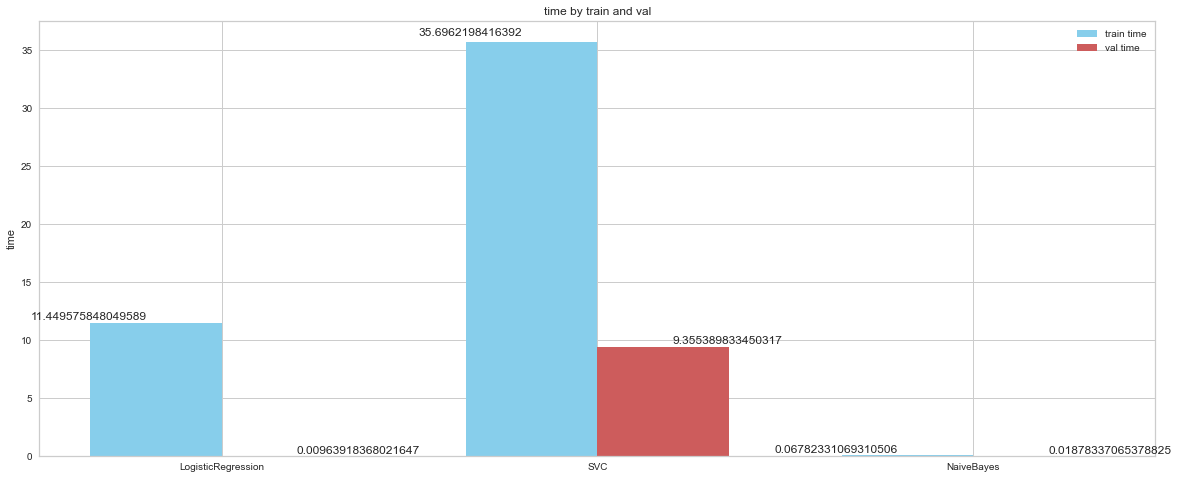

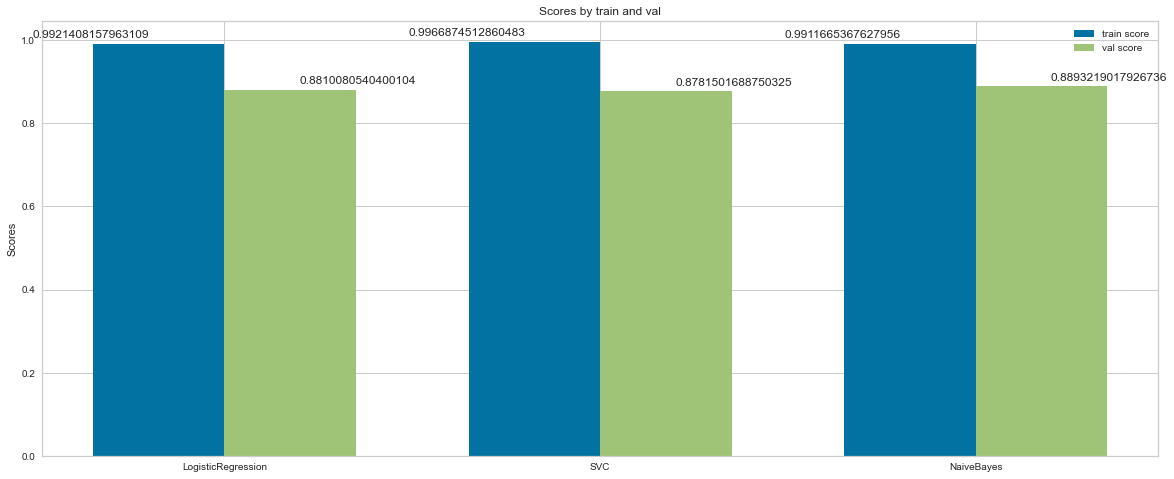

In [48]:
show_metrics(rs_lr, rs_svc, rs_nb)

Machine Learning Model with Count Word Vectorization variables 

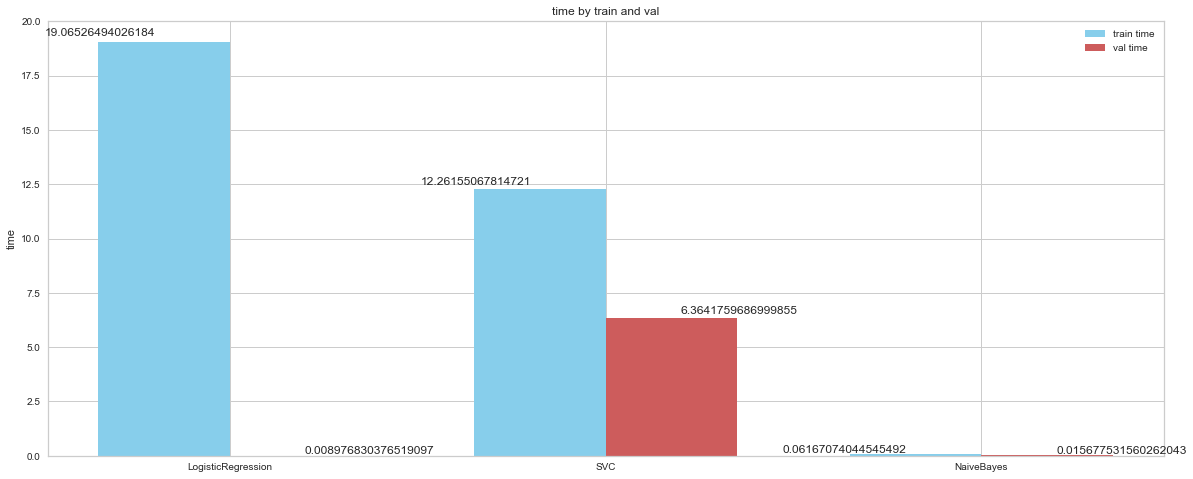

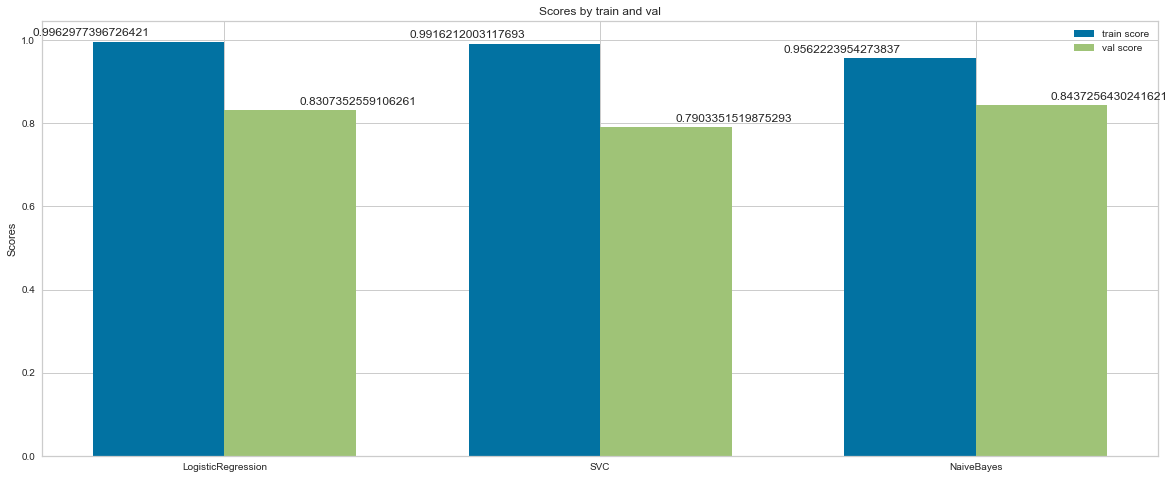

In [49]:
show_metrics(rs_lr_vec, rs_svc_vec, rs_nb_vec)

### 5. Conclusion

- From the model building results, we can conclude that Naive Bayes Algorithm performs best for any type of Word Vectorization Methods. 
- We can also understand that TF-IDF data variables were able to provide high validation score than Count Vectorization variables.